In [1]:
import os
import numpy as np
import shutil
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 Data Exploration

## 1.1 Load data and generate descriptive statistics

In [71]:
# Load the CSV file into a Pandas DataFrame
data_file = 'Q1_Q2_data.csv'

with open(os.path.join("data", data_file), 'r') as f:
    df = pd.read_csv(f)

# Generate descriptive statistics
df.describe()

,block,y,x_0,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_1014,x_1015,x_1016,x_1017,x_1018,x_1019,x_1020,x_1021,x_1022,x_1023
count,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,...,20000.00000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000
mean,2.000000,0.357450,0.013000,0.013100,0.011900,0.044900,0.341050,0.01075,0.023500,0.015300,...,0.18335,1.716750,0.01445,0.015800,0.013950,0.086500,0.00950,0.012750,0.012700,0.011650
std,1.414249,0.479261,0.113717,0.114582,0.108899,0.213041,0.624864,0.10361,0.153457,0.122746,...,0.44782,1.157794,0.12059,0.125105,0.118136,0.290899,0.09752,0.112641,0.112869,0.107307
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,1.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,0.00000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,0.00000,2.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
max,4.000000,1.000000,2.000000,2.000000,2.000000,2.000000,5.000000,2.00000,2.000000,1.000000,...,5.00000,8.000000,2.00000,2.000000,2.000000,3.000000,2.00000,2.000000,2.000000,1.000000


## 1.2 Check missing values

In [72]:
# Count the number of NaN in each column:
num_nans, cols = [], []
for col in df.columns:
  nans = df[col].isnull().sum()
  if nans > 0:
    num_nans.append(nans)
    cols.append(col)
    # print(f"Number of NaNs in {col}: {nans}")

temp = pd.DataFrame()
temp["column_name"] = cols
temp["num_NaNs"] = num_nans
temp.T

,0,1,2,3,4,5,6,7,8,9,...,147,148,149,150,151,152,153,154,155,156
column_name,x_24,x_35,x_48,x_54,x_58,x_63,x_66,x_67,x_69,x_78,...,x_952,x_960,x_971,x_975,x_976,x_980,x_990,x_992,x_996,x_1006
num_NaNs,1,1,1,1,1,1,2,1,1,1,...,1,1,1,1,1,1,1,1,1,1


## 1.3 Missing value treatment

In [73]:
# First, replace the first NaN with a default value such as 0 for simplicity
default_value = 0
df.fillna(value=default_value, limit=1, inplace=True)
# Then, propagate non-null values forward
df.fillna(method="ffill", inplace=True)
df.to_csv(os.path.join("data", "Q1_Q2_data_cleaned.csv"))

## 1.4 Check feature collinearity, feature correlation matrix

<AxesSubplot:>

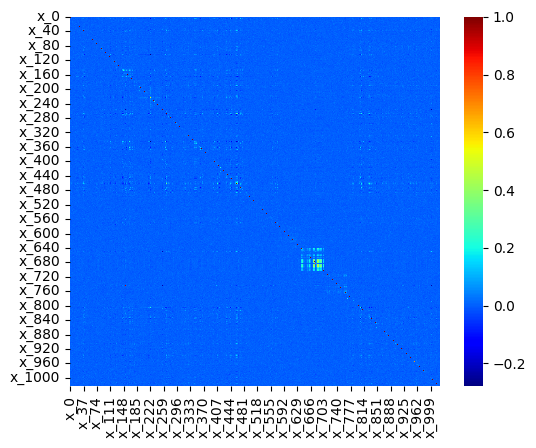

In [10]:
# Getting features only
dfx = df.drop(columns=['block', 'y'], axis=1)
# Getting feature correllation matrix
corr_mat = dfx.corr(method='pearson')
sns.heatmap(corr_mat, vmax=1, square=True, annot=False, cmap='jet')

As we can see from the above feature correlation matrix, the correlation among the 1024 features is not that high, therefore no need to deal with the collinearity for now.

## 1.5 Prepare data for visualization

In [11]:
def get_raster_data(arr):
  raster = []
  t = np.arange(arr.shape[1])
  for i in range(arr.shape[0]):
    raster.append(t[arr[i, :] > 0])

  return raster

# get block 0 data
block_id = 0
df_blk1 = df[df["block"] == block_id]
arr_blk1_y0 = df_blk1[df_blk1["y"] == 0].drop(columns=["block", "y"]).to_numpy().T
arr_blk1_y1 = df_blk1[df_blk1["y"] == 1].drop(columns=["block", "y"]).to_numpy().T

raster_blk1_y0 = get_raster_data(arr_blk1_y0)
raster_blk1_y1 = get_raster_data(arr_blk1_y1)

## 1.6 Draw a spike raster plot

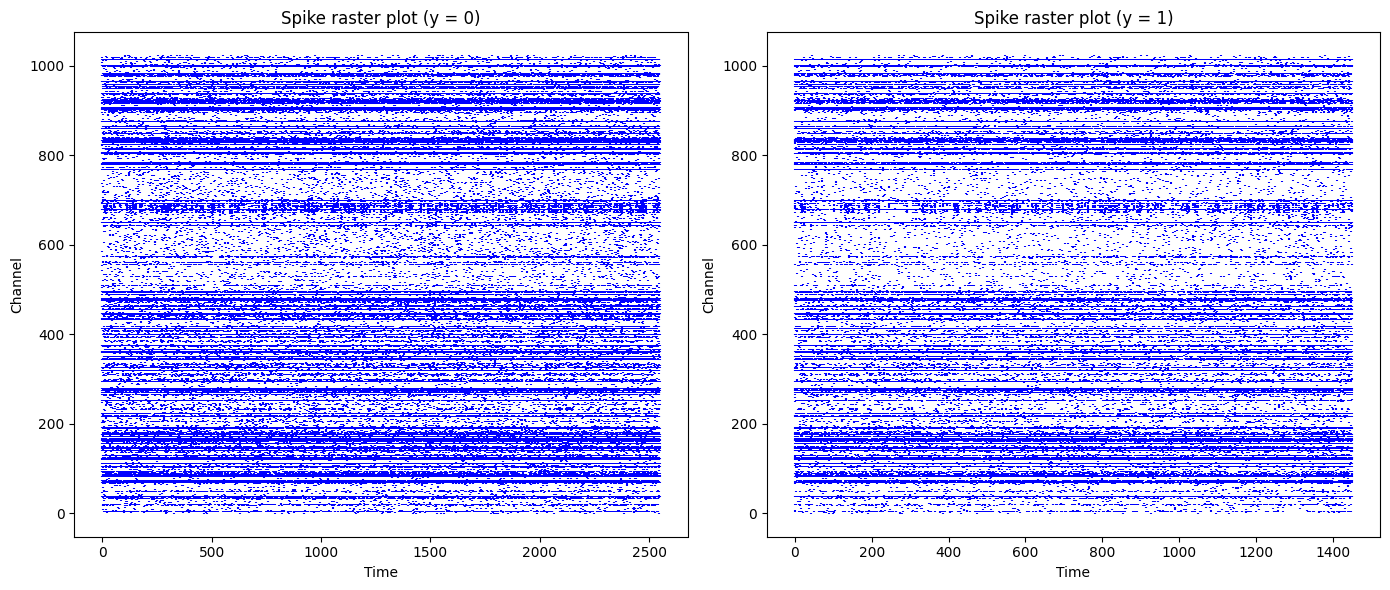

In [12]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
# Plot data on each subplot
axs[0].eventplot(raster_blk1_y0, color='b')    
axs[0].set_title('Spike raster plot (y = 0)')
axs[0].set_xlabel('Time')
axs[0].set_ylabel('Channel')

axs[1].eventplot(raster_blk1_y1, color='b')    
axs[1].set_title('Spike raster plot (y = 1)')
axs[1].set_xlabel('Time')
axs[1].set_ylabel('Channel')
# Adjust spacing between subplots
plt.tight_layout()
# Display the spike raster plot
plt.show()

Raster plots are a very informative visualization technique of neural activity. They allow us to easily inspect the neural activity over time span on a single as well as on all channels in a very intuitive way. Furthermore, they also allow us to visualize the spiking activity w.r.t. specific stimuli. From the above plots, it is very interesting to learn there are seems not many easy noticeable pattern between the two patterns (y=0 vs. y=1). 

## 1. 7 Check if the Dataset is imbalanced

The ratio of class 1 vs class 0 is 1 : 1.80


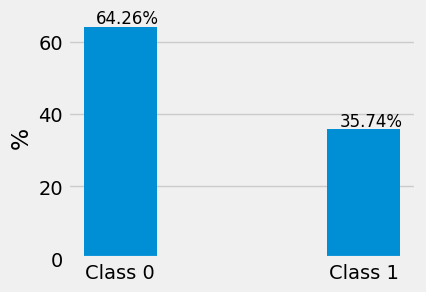

In [118]:
# check the percentage of the 2 classes, and see if they are balanced or not
binary_label = df['y'].to_numpy()
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use("fivethirtyeight")
x_pos = np.array([0, 1])
width = 0.3
pct_class1 = np.round(sum(binary_label)/len(binary_label) * 100, 2)
pct_class0 = np.round(100 - pct_class1, 2)
yy = [pct_class0, pct_class1]

print(f"The ratio of class 1 vs class 0 is 1 : {pct_class0/pct_class1:.2f}")
# make the bar plot
fig, ax = plt.subplots(figsize=(4,3))
ax.bar(x_pos,yy, width=width)
ax.set_xticks(x_pos)
ax.set_xticklabels(["Class 0","Class 1"])
ax.xaxis.grid(False)
ax.yaxis.grid(True)
plt.ylabel("%")
# add annotations on top of the bar
for index, data in enumerate(yy):
    ax.text(x=x_pos[index]-0.1,y=data+1,s=f"{data}%",fontdict=dict(fontsize=12))
plt.show()

Note: As the ratio of positive vs negative class is 1 to 1.8 not that imbalanced.

There are many approaches to deal with unbalanced data issues, in a nutshell, they all come down to the following ideas:
- Sampling Techniques: Upsampling (increase your minority class), Downsample (decrease your majority class)
- Generate Synthetic Samples, SMOTE or Synthetic Minority Oversampling Technique, it is a technique similar to  upsampling to create synthetic samples. It uses a nearest neighbors algorithm to generate new and synthetic data we can use for training our model.
- Changing the Class Weights of Loss Function
- Using Data Augmentation Techniques
- Using Transfer Learning

# Q1 Build decoder
After data cleaning and the above initial data exploratory analysis, to build a causal model (“decoder”) that uses x to estimate y that could work in real-time, the following steps were taken. 
- Step1, split the whole dataset into trainval (train, validation) and test dataset
- Step2, train and evaluate several classifiers on the trainval dataset using KFold Cross-Validation (CV)
- Step3, compare different model/classifiers performance on the same validation dataset to determine which model will be selected for the subsequent analysis
- Step4, perform hyperparameter tuning for the selected model on the trainval dataset to find out an optimized set of hyperparameter such as learning rate, window size, number of layers, dropout, kernel size, number of filters, channels, number of estimators, epochs etc.
- Step5, retrain the final tunned model using the trainval dataset, then test the final trained model on the test dataset. If the model performance on the test dataset is “good enough" based on the predefined metric such as accuracy, precision recall AUC, ROC AUC, precision, recall, f1-score, etc. Then, the final trained model can be deployed to decode in real-time.


Discussion points:
- Step2, for time series data split, we should use the time series KFold CV, and this can be repreated multiple times to get a more robust results.
- As the goal of this technical challenge is not after the absolujte performance of the model itself, given the very limited computational power of my ancient laptop without GPU, I will just do the model training and evaluation once for each decoder, with focuses on analysis, derived insights, modeling approaches, and discussions of my decoding model.

## Split the data


In [7]:
# load the cleaned raw data
with open(os.path.join("data", "Q1_Q2_data_cleaned.csv"), 'r') as f:
    df = pd.read_csv(f, index_col=0)
# split train: block 0, 1; val: block 2, 3; test: block 4
b0 = df['block'] == 0
b1 = df['block'] == 1
b2 = df['block'] == 2
b3 = df['block'] == 3
b4 = df['block'] == 4
Xy_train = df[b0 | b1].drop(columns=["block"]).to_numpy()
Xy_val = df[b2 | b3].drop(columns=["block"]).to_numpy()
Xy_test = df[b4].drop(columns=["block"]).to_numpy()

## Model comparison

In [2]:

from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

names = [
    "Logistic Reg",
    "Nearest Neighbors",
    "RBF SVM",
    "Decision Tree",
    "Random Forest",
    "AdaBoost",
    "Naive Bayes",
    "QDA",
]

classifiers = [
    LogisticRegression(),
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    DecisionTreeClassifier(max_depth=2),
    RandomForestClassifier(max_depth=2, n_estimators=5, max_features=1),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis(),
]

In [37]:
X_train, y_train = Xy_train[:, 1:], Xy_train[:, 0]
X_val, y_val = Xy_val[:, 1:], Xy_val[:, 0]

best_score, all_val_score = 0, []
# iterate over classifiers
for model_name, clf in zip(names, classifiers):
    print("="*100)
    print(f"Traing {model_name}...")
    clf = make_pipeline(StandardScaler(), clf)
    clf.fit(X_train, y_train)
    score = clf.score(X_val, y_val)
    print(f"Score: {score:.4f}")
    all_val_score.append(score)
    # Find the best model based on coefficient of determination
    if score > best_score:
        best_score = score
        best_model = model_name

print("="*100)
print(f"The best model is: {best_model}")
print(f"The best model performance: {best_score:.4f}")
# Save all the model's validation performance
np.save('all_model_val_score.npy', np.array(all_val_score))

Traing Logistic Reg...
Score: 0.6793
Traing Nearest Neighbors...
Score: 0.4462
Traing RBF SVM...
Score: 0.6279
Traing Decision Tree...
Score: 0.7046
Traing Random Forest...
Score: 0.6279
Traing AdaBoost...
Score: 0.7804
Traing Naive Bayes...
Score: 0.5490
Traing QDA...
Score: 0.6188
The best model is: AdaBoost
The best model performance: 0.7804


From the above analysis, I found that the best model is AdaBoost, with an accuracy score of 0.78. However, all the above methods are just using the current timeframe of x to estimate the current y which could easily work in real-time. 

However, all the above methods are not using the history of x to infer the current y. Given the nature of the time series data such as neural activities, the history or context of x could be very informative of y especially if the nature of the task/activity/behavior during data collection is a persistent activity or stateful activity or continuous behavior. In other words, imagine if the monkey holds/grabs/drags something then the history of x activity could be very informative of current y when compared to a simple button click event.
Therefore, LSTM and TCN based modeling approaches comes to the picture. 

Why LSTM? LSTM networks are well-suited to classifying, processing, and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs. Relative insensitivity to gap length is an advantage of LSTM over RNNs, hidden Markov models and other sequence learning methods in numerous applications.

Why TCN? Prior work has shown that TCNs can achieve good performance when learning spatial-temporal patterns from long term series data. TCN model architectures are comprised of causal and dilated convolutional layers. The causal convolutions ensure that there is no leakage of information from the future to the past. The dilated convolutions help the model to learn longer historical information while maintaining a relatively simple architecture. This is an important property as the dataset might not be large enough such that a much more complex but also promising architecture (i.e., a FCN or a ResNet) might easily overfit it. The TCN model implemented here followed the architecture defined in Bai et al.
- Paper: https://arxiv.org/abs/1803.01271
- Code: https://github.com/locuslab/TCN/

To leverage the history of x to estimate current y, the first step is to determine a proper sliding window length for LSTM and TCN.

## Determin the window length

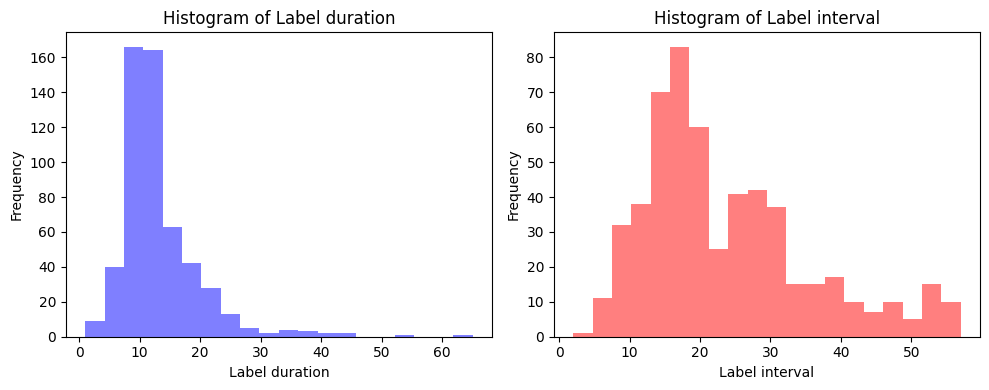

In [10]:
def get_onset_offset(mask):
    mask_diff = np.diff(mask)
    onset_indices = np.where(mask_diff == 1)[0] + 1
    offset_indices = np.where(mask_diff == -1)[0]
    if mask[0] == 1:
        onset_indices = np.insert(onset_indices, 0, 0)
    if mask[-1] == 1:
        offset_indices = np.append(offset_indices, len(mask)-1)
    onsets = onset_indices
    offsets = offset_indices
    return onsets, offsets

binary_mask = df['y'].to_numpy()
onsets, offsets = get_onset_offset(binary_mask)

label_duration, lable_interval = [], []
for i in range(len(onsets)):
    label_duration.append(offsets[i] - onsets[i] + 1)
    if i < len(onsets) - 1:
        lable_interval.append(onsets[i + 1] - offsets[i] - 1)


# Plot the label duration and interval histograms  
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
axes[0].hist(label_duration, bins=20, color='blue', alpha=0.5)
axes[1].hist(lable_interval, bins=20, color='red', alpha=0.5)
# Set labels and titles for the subplots
axes[0].set_xlabel('Label duration')
axes[1].set_xlabel('Label interval')
axes[0].set_ylabel('Frequency')
axes[1].set_ylabel('Frequency')
axes[0].set_title('Histogram of Label duration')
axes[1].set_title('Histogram of Label interval')
# Adjust the spacing between subplots
plt.tight_layout()
# Display the plot
plt.show()

Based on the above histogram plot of the label duration and interval, it seems the median of the label duration 10 points is a good starting point. This window length parameter has been made configurable in the /config/*.josn file which can be optimized as needed.

## Train, validate, test LSTM, TCN however you like it, made simple like never before

In [110]:
# Just need to import those modules
import torch
from run_experiment_demo import setup_config, setup_dataset, setup_model, setup_expriment, launch_tensorboard

In [ ]:
print("Start running the experiment...")
# Setup config
# For debug config_file = "config/example_config.json"
# For TCN: config_file = "config/tcn_config.json"
config_file = "config/lstm_config.json"

params = setup_config(config_file)

# Setup dataset
# Example 2D array
# arr = np.random.randint(0, 2, size=(1000, 4))
with open(os.path.join("data", "Q1_Q2_data_cleaned.csv"), 'r') as f:
    df = pd.read_csv(f, index_col=0)
arr_Xy = df.drop(columns=["block"]).to_numpy()
data = setup_dataset(arr_Xy, params)

# Setup model
model = setup_model(params, data["data_shape"])

# Setup experiment
exp = setup_expriment(params, data, model)

# Remove any previous old logs
log_dir = os.path.join(params["mlflow_io"]["output_dir"], "logs")
shutil.rmtree(log_dir)

# Run experiment
# Train and validate the model
exp.train()

# Predict
exp.predict()

# Provide the path to your log directory
log_dir = os.path.join(params["mlflow_io"]["output_dir"], "logs")
# Launch TensorBoard
launch_tensorboard(log_dir)

Start running the experiment...
Train set size: (8000, 1025)
Validation set size: (8000, 1025)
Test set size: (8000, 1025)
Start runner...
Start model training...

Train    Epoch 1 / 100    Loss 0.6638    Metric 0.3498
Val   Epoch 1 / 100    Loss 0.6547    Metric 0.6389
Test   Epoch 1 / 100    Loss 0.6547    Metric 0.6389
Successfully saved model: exp_output_lstm_4compare\model\model_1.pt
Successfully saved torchscript: exp_output_lstm_4compare\model\model_1_torchscript_cpu.pt
Successfully saved checkpoint: exp_output_lstm_4compare\checkpoint\checkpoint_1.pt

Train    Epoch 2 / 100    Loss 0.5864    Metric 0.6284
Val   Epoch 2 / 100    Loss 0.5466    Metric 0.7255
Test   Epoch 2 / 100    Loss 0.5466    Metric 0.7255
Successfully saved model: exp_output_lstm_4compare\model\model_2.pt
Successfully saved torchscript: exp_output_lstm_4compare\model\model_2_torchscript_cpu.pt
Successfully saved checkpoint: exp_output_lstm_4compare\checkpoint\checkpoint_2.pt

Train    Epoch 3 / 100    Loss 0

INFO:pytorch_profiler:Monitor runs begin


TensorBoard started at http://localhost:6006/


## Justify the final model selection

In [81]:
from sklearn.metrics import accuracy_score

all_val_score = np.load('all_model_val_score.npy')
lstm_tcn_val_result_dir = ['exp_output_lstm_4compare', 'exp_output_tcn_4compare']
all_model_name = names.copy()
lstm_tcn_name = ['LSTM', 'TCN']
for i, val_res_dir in enumerate(lstm_tcn_val_result_dir):
    res_dir = os.path.join(val_res_dir, 'prediction/final_prediction_best.pt')
    with open(res_dir, 'rb') as f:
        res = torch.load(f)
        y_pred = res['y_pred']
        y = res['y']

    # Convert predicted probability values to binary labels based on a threshold
    y_pred = [1 if value >= 0.5 else 0 for value in y_pred]
    accuracy = accuracy_score(y, y_pred)
    all_val_score = np.append(all_val_score, accuracy)
    all_model_name.append(lstm_tcn_name[i])

temp = pd.DataFrame()
temp['model_name'] = all_model_name
temp['val_score'] = np.round(all_val_score, 4)
print(temp)
print("="*32)
print(f"The best model is: {all_model_name[np.argmax(all_val_score)]}")
print(f"The best model's score: {all_val_score[np.argmax(all_val_score)]:.4f}")

          model_name  val_score
0       Logistic Reg     0.6792
1  Nearest Neighbors     0.4462
2            RBF SVM     0.6279
3      Decision Tree     0.7046
4      Random Forest     0.6279
5           AdaBoost     0.7804
6        Naive Bayes     0.5490
7                QDA     0.6188
8               LSTM     0.7860
9                TCN     0.7457
The best model is: LSTM
The best model's score: 0.7860


So, based on all the above model performance analysis and comparison on the same validation dataset, we can see that "best" model is LSTM. This could be because LSTM can leverage the history of x to estimate y, which is make sense. 

# Q2
If only the first block (block=0) was available for training and evaluation, as there are only 4000 samples with 1024 features. The dataset is quite small. Before training and evaluating the model, I would perform the following additional analysis. 
- Perform dimensionality reduction analysis using PCA and tSNE
- Perform feature selection based on the feature importance score
    - Filter Methods: Filter feature selection method applies a statistical measure to assign a scoring to each feature. Example- Correlation, T-test, ANOVA, Chi-Square.
    - Wrapper methods: Wrapper method considers the selection of a set of features as a search problem, where different combinations are prepared, evaluated, and compared to other combinations. Example- Recursive, Boruta.
    - Embedded Methods: Embedded method learn which feature best contributes to the accuracy of the model while the model is being created. The most common type of embedded feature selection methods are regularization methods. Example- Tree Based Model, Elastic Net Regression.

##  Dimensionality reduction analysis - PCA
Principle Component Analysis (PCA) is just one of the linear algebra methods of dimensionality reduction. This helps us in extracting a new set of variables from an existing large set of variables in the form of principle components. Within this, a principal component is a linear combination of the original variables and is organized in such a way that the first principal component explains the maximum amount of variance in the dataset. For this, we need to normalize the data before we perform PCA because otherwise it will lead to a large focus on variables with large variables which is undesirable (we can thus use scalers such as the robust or standard scaler from sklearn).

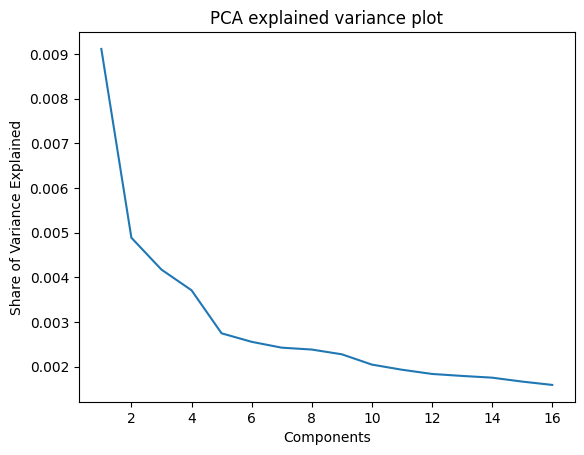

In [82]:
# Import the PCA algorithm from sklearn
from sklearn.decomposition import PCA 
# Import the standard scaler
from sklearn.preprocessing import StandardScaler

# Initialise the standard scaler
sc = StandardScaler()
# Create a copy of the original dataset
X = df.drop(columns=['block', 'y'], axis=1)
X_rs = X.copy()
# Fit transform all of our data
for c in X_rs.columns:
    X_rs[c] = sc.fit_transform(X_rs[c].values.reshape(-1,1))

# Run it with 16 components
pca = PCA(n_components=16, whiten=True) 
# Fit it to our data
pca.fit(X_rs)
# Extract the explained variance
explained_variance = pca.explained_variance_ratio_
singular_values = pca.singular_values_


# Create an x for each component
x = np.arange(1,len(explained_variance)+1)
plt.plot(x, explained_variance)
plt.ylabel('Share of Variance Explained')
plt.title("PCA explained variance plot")
plt.xlabel("Components")
plt.show()

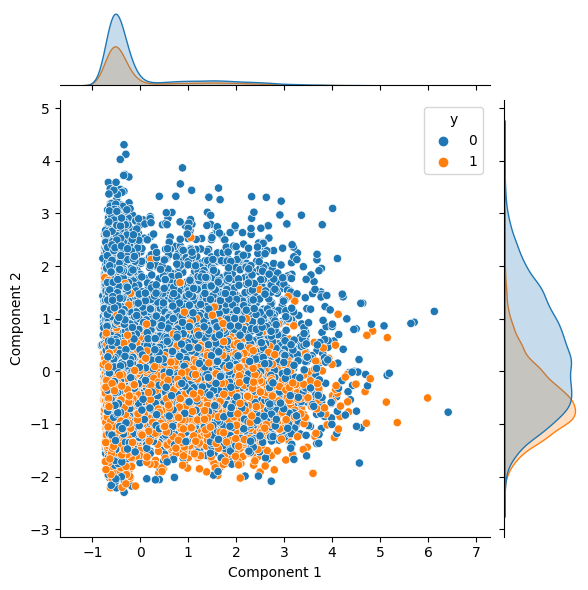

In [83]:
# Set the components to 2
pca = PCA(n_components=2, whiten=True) 
# Fit the model to our data and extract the results
X_pca = pca.fit_transform(X_rs)

# Create a dataframe from the dataset
df_temp = pd.DataFrame(data = X_pca,
                 columns = ["Component 1", 
                            "Component 2"])

# Merge this with the raw data
df_temp = pd.merge(df,
              df_temp,
              left_index=True,
              right_index=True,
              how = "inner")

# Plot the resulting data from two dimensions
g = sns.jointplot(data = df_temp,
                 x = "Component 1",
                 y = "Component 2",
                 hue = "y")

## Dimensionality reduction analysis - t-SNE
t-Distrubuted Stochastic Neighbor Embedding (t-SNE) is another dimensionality reduction algorithm but unlike PCA, can account for non-linear relationships. In this sense, data points can be mapped in lower dimensions in two main ways:
- Local approaches: mapping nearby points on the higher dimensions to nearby points in the lower dimension also
- Global approaches: attempting to preserve the geometry at all scales so keeping nearby points close together while keeping far away points away from each other as well

In [86]:
# Import the method
from sklearn.manifold import TSNE

# Set the hyperparmateres
keep_dims = 2
lrn_rate = 700
prp = 30

# Extract the data as a copy
tsnedf = X_rs.copy()

# Creae the model
tsne = TSNE(n_components = keep_dims, 
            perplexity = prp, 
            random_state = 42,
            n_iter = 1000,
            n_jobs = -1)

# Apply it to the data
X_dimensions = tsne.fit_transform(tsnedf)
# Check the shape
X_dimensions.shape

(20000, 2)

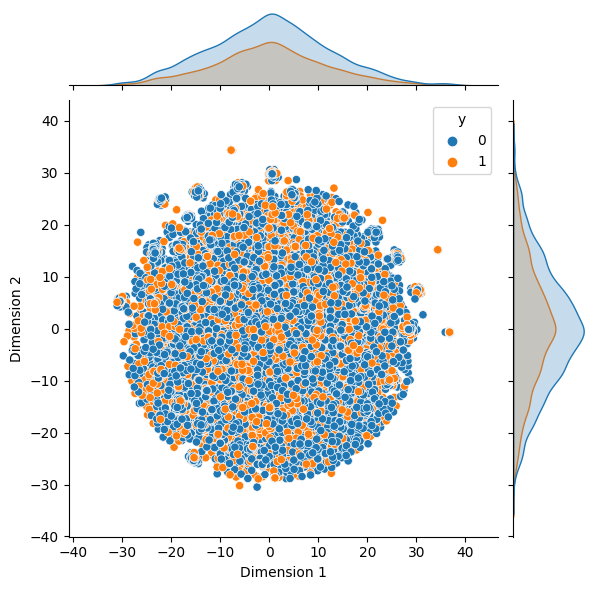

In [88]:
# Create a dataframe from the dataset
tsnedf_res = pd.DataFrame(data = X_dimensions,
                         columns = ["Dimension 1", 
                                "Dimension 2"])

# Merge this with the raw data
df_temp = pd.merge(df,
              tsnedf_res,
              left_index=True,
              right_index=True,
              how = "inner")

# Plot the result
g = sns.jointplot(data = df_temp,
                 x = "Dimension 1",
                 y = "Dimension 2",
                 hue = "y")

What we can see here is that we get a slightly different clearer picture of the different positions to some degree than we did with PCA before. We can see now that y appears very widely distributed. This makes it slightly clearer and suggests that the relationships between variables may indeed be non-linear!

## Feature importance score

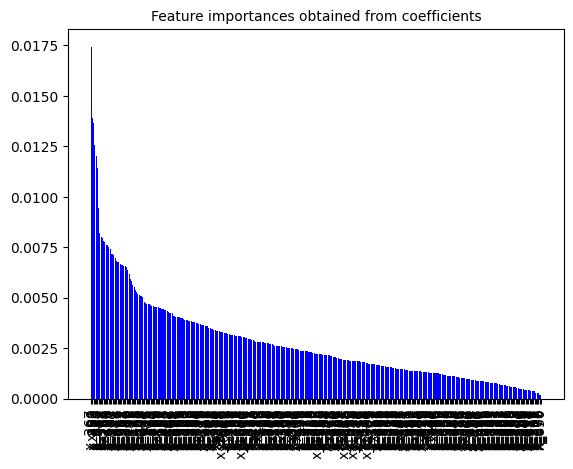

In [8]:
from sklearn.preprocessing import StandardScaler
from xgboost import XGBClassifier

# get only block 0 data
df_blk0 = df[df['block']==0]
df_blk0 = df_blk0.drop('block', axis=1)

# split block 0 into train and evaluation, half by half
Xy_train = df_blk0[:int(len(df_blk0)/2)]
Xy_val = df_blk0[int(len(df_blk0)/2):]
X_train, y_train = Xy_train.drop('y', axis=1), Xy_train['y']
X_val, y_val = Xy_val.drop('y', axis=1), Xy_val['y']

ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)
X_val_scaled = ss.transform(X_val)

# Obtain importances from a tree-based model XGBClassifier 
model = XGBClassifier()
model.fit(X_train_scaled, y_train)
importances = pd.DataFrame(data={
    'Attribute': X_train.columns,
    'Importance': model.feature_importances_
})
importances = importances.sort_values(by='Importance', ascending=False)

# only plot features with a importances score > 0 
filt = importances['Importance'] > 0
selected_feature = importances['Attribute'][filt]
plt.bar(x=selected_feature, height=importances['Importance'][filt], color='b')
plt.title('Feature importances obtained from coefficients', size=10)
plt.xticks(rotation='vertical')
plt.show()

In [9]:
# get the selected data for model development
selected_cols = selected_feature.tolist()
selected_feature_df = df_blk0[['y'] + selected_cols]
selected_feature_df.head()

,y,x_367,x_30,x_890,x_461,x_436,x_817,x_840,x_463,x_172,...,x_375,x_412,x_359,x_243,x_265,x_312,x_277,x_106,x_676,x_850
0,0,0,0,0,0,1,1,0,1,0.0,...,1,0.0,0,0,1,1,0,0,0,0
1,0,0,0,0,1,0,0,0,0,0.0,...,1,0.0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,0.0,...,2,0.0,0,0,0,0,1,0,0,0
3,0,0,0,0,0,0,0,0,0,0.0,...,2,0.0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,1,1,0,2,1.0,...,1,0.0,1,0,0,0,0,0,0,0


## Train and evaluate the LSTM model using the selected features on block 0

In [10]:
# Just need to import those modules
import torch
import shutil
from run_experiment_demo import setup_config, setup_dataset, setup_model, setup_expriment, launch_tensorboard

In [100]:
print("Start running the experiment...")
# Setup config
config_file = "config/lstm_config.json"

params = setup_config(config_file)

# Dynamicaly change the output_dir name just in case it overwrite previous output
params["mlflow_io"]["output_dir"] = "exp_out_Q2_kf1"
params["mlflow_data"]["train_val_test_split_ratio"] = [[0, 0.5], [0.5, 1], [0.5, 1]]

# Setup dataset
# Example 2D array
# arr = np.random.randint(0, 2, size=(1000, 4))
arr_Xy = selected_feature_df.to_numpy()
data = setup_dataset(arr_Xy, params)

# Setup model
model = setup_model(params, data["data_shape"])

# Setup experiment
exp = setup_expriment(params, data, model)

# Remove any previous old logs
log_dir = os.path.join(params["mlflow_io"]["output_dir"], "logs")
shutil.rmtree(log_dir)

# Run experiment
# Train and validate the model
exp.train()

# Predict
exp.predict()

# Provide the path to your log directory
log_dir = os.path.join(params["mlflow_io"]["output_dir"], "logs")
# Launch TensorBoard
launch_tensorboard(log_dir)

Start running the experiment...
Train set size: (2000, 357)
Validation set size: (2000, 357)
Test set size: (2000, 357)
Start runner...
Start model training...

Train    Epoch 1 / 100    Loss 0.6773    Metric 0.3214
Val   Epoch 1 / 100    Loss 0.6678    Metric 0.3662
Test   Epoch 1 / 100    Loss 0.6678    Metric 0.3662
Successfully saved model: exp_out_Q2_kf1\model\model_1.pt
Successfully saved torchscript: exp_out_Q2_kf1\model\model_1_torchscript_cpu.pt
Successfully saved checkpoint: exp_out_Q2_kf1\checkpoint\checkpoint_1.pt

Train    Epoch 2 / 100    Loss 0.6481    Metric 0.3333
Val   Epoch 2 / 100    Loss 0.6736    Metric 0.4908
Test   Epoch 2 / 100    Loss 0.6736    Metric 0.4908
Successfully saved model: exp_out_Q2_kf1\model\model_2.pt
Successfully saved torchscript: exp_out_Q2_kf1\model\model_2_torchscript_cpu.pt
Successfully saved checkpoint: exp_out_Q2_kf1\checkpoint\checkpoint_2.pt

Train    Epoch 3 / 100    Loss 0.6407    Metric 0.4862
Val   Epoch 3 / 100    Loss 0.6657    Me

INFO:pytorch_profiler:Monitor runs begin


TensorBoard started at http://localhost:6006/


# Q3

In [101]:
from sklearn.metrics import roc_auc_score, precision_recall_curve, roc_curve, f1_score, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
import os
import torch
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [102]:
# Get Q3 teammate results and ground truth
with open(os.path.join("data", "Q3_teammate_data.csv"), 'r') as f:
    df1 = pd.read_csv(f)
with open(os.path.join("data", "Q1_Q2_data.csv"), 'r') as f:
    df2 = pd.read_csv(f)
res_df = df1.copy()
res_df['y'] = df2[df2['block']==0]['y']
res_df = res_df[['y', 'T1', 'T2']]
res_teammate = res_df.to_numpy()
res_df

,y,T1,T2
0,0,0.710971,0.635636
1,0,0.702515,0.632269
2,0,0.685900,0.625699
3,0,0.661849,0.616255
4,0,0.631836,0.604356
...,...,...,...
3995,1,0.338324,0.319808
3996,1,0.382447,0.332011
3997,1,0.418853,0.342175
3998,1,0.444249,0.349467


In [103]:
def train_val_test_split(arr, split_ratio):
    # Split the time series data
    num_len = arr.shape[0]
    train_data = arr[int(split_ratio[0][0] * num_len):int(split_ratio[0][1] * num_len)]
    val_data = arr[int(split_ratio[1][0] * num_len):int(split_ratio[1][1] * num_len)]
    test_data = arr[int(split_ratio[2][0] * num_len):int(split_ratio[2][1] * num_len)]

    return train_data, val_data, test_data

In [104]:
lstm_res_dirs = ['exp_out_Q2_kf1', 'exp_out_Q2_kf2']
split_ratio = [
    [[0, 0.5], [0.5, 1], [0.5, 1]],
    [[0.5, 1], [0, 0.5], [0, 0.5]],
]
win_size = 10
teammate_all, y_pred_all = [], []
for i, _res_dir in enumerate(lstm_res_dirs):
    res_dir = os.path.join(_res_dir, 'prediction/final_prediction_best.pt')
    with open(res_dir, 'rb') as f:
        res = torch.load(f)
        y_pred = res['y_pred']
        y = res['y']

        _, _, _test1 = train_val_test_split(res_teammate, split_ratio[1])
        _test_used = _test1[win_size - 1:]
        teammate_used = _test_used[:len(y)]

        teammate_all.append(teammate_used)
        y_pred_all.append(y_pred)

teammate_all = np.vstack(teammate_all)
y_pred_all = np.hstack(y_pred_all)

q3_teammate_res = np.zeros((len(y_pred_all), 4))
q3_teammate_res[:, :3] = teammate_all
q3_teammate_res[:, 3] = y_pred_all
columns = ['y', 'T1', 'T2', 'T3']
q3_teammate_res_df = pd.DataFrame(data=q3_teammate_res, columns=columns)
q3_teammate_res_df.head()

,y,T1,T2,T3
0,0.0,0.499279,0.524183,0.020659
1,0.0,0.494330,0.506455,0.121934
2,0.0,0.494829,0.488705,0.654107
3,0.0,0.496096,0.471088,0.612018
4,0.0,0.492447,0.453922,0.979749


In [105]:
# evaluate model performance
print("Evaluate model performance ...")
y_true = q3_teammate_res[:, 0]
accuracy_all, precision_all, recall_all, f1_all, cm_all = [], [], [], [], []
roc_auc_all, pr_auc_all = [], []
for i in range(1, 4):
    predicted_probabilities = q3_teammate_res[:, i]
    # Compute ROC curve and ROC AUC
    fpr, tpr, thresholds = roc_curve(y_true, predicted_probabilities)
    roc_auc = auc(fpr, tpr)
    # Compute precision and recall
    precision, recall, _ = precision_recall_curve(y_true, predicted_probabilities)
    pr_auc = auc(recall, precision)
    # Calculate the Youden's J statistic (tpr - fpr) and find the optimal cutoff
    optimal_index = np.argmax(tpr - fpr)
    optimal_cutoff = thresholds[optimal_index]
    print(f"{columns[i]} Optimal Cutoff: {optimal_cutoff:.2f}")

    # optimal_cutoff = 0.5
    y_pred = [1 if value >= optimal_cutoff else 0 for value in predicted_probabilities]

    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1 = f1_score(y_true, y_pred)
    cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
   
    accuracy_all.append(accuracy)
    precision_all.append(precision)
    recall_all.append(recall)
    f1_all.append(f1)
    cm_all.append(cm)
    roc_auc_all.append(roc_auc)
    pr_auc_all.append(pr_auc)


Evaluate model performance ...
T1 Optimal Cutoff: 0.38
T2 Optimal Cutoff: 0.40
T3 Optimal Cutoff: 0.89


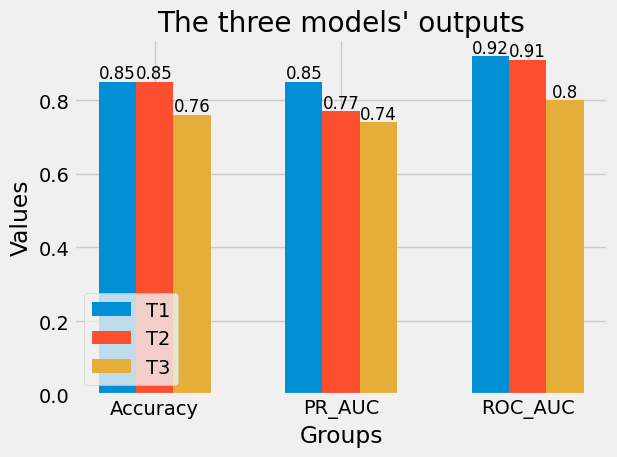

In [106]:
# Example data
labels = ['Accuracy', 'PR_AUC', 'ROC_AUC']
accuracy_all = np.round(accuracy_all, 2)
pr_auc_all = np.round(pr_auc_all, 2)
roc_auc_all = np.round(roc_auc_all, 2)
category1 = [accuracy_all[0], pr_auc_all[0], roc_auc_all[0]]
category2 = [accuracy_all[1], pr_auc_all[1], roc_auc_all[1]]
category3 = [accuracy_all[2], pr_auc_all[2], roc_auc_all[2]]

# Set the width of the bars
bar_width = 0.2

# Set the positions of the bars on the x-axis
x = np.arange(len(labels))

# Plot the bars for each category
plt.bar(x - bar_width, category1, width=bar_width, label='T1')
plt.bar(x, category2, width=bar_width, label='T2')
plt.bar(x + bar_width, category3, width=bar_width, label='T3')

# Set the labels and title
plt.xlabel('Groups')
plt.ylabel('Values')
plt.title("The three models' outputs")
plt.xticks(x, labels)
plt.legend(loc='lower left')

# Add text annotations on top of the bars
for i in range(len(labels)):
    plt.text(x[i] - bar_width, category1[i] + 0.01, str(category1[i]), ha='center', fontsize=12)
    plt.text(x[i], category2[i] + 0.01, str(category2[i]), ha='center', fontsize=12)
    plt.text(x[i] + bar_width, category3[i] + 0.01, str(category3[i]), ha='center', fontsize=12)

# Display the plot
plt.tight_layout()
plt.show()

## Plot confusion matrices

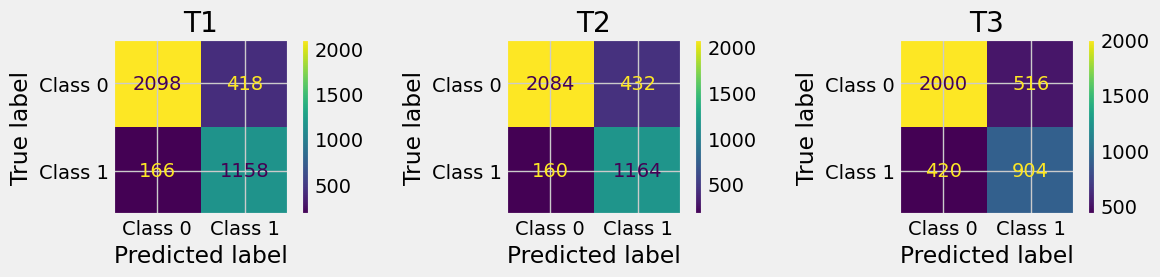

In [107]:
# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(12, 3))

# Plot confusion matrices
labels = ['Class 0', 'Class 1']
disp1 = ConfusionMatrixDisplay(cm_all[0], display_labels=labels)
disp1.plot(ax=axes[0])
disp1.ax_.set_title('T1')

disp2 = ConfusionMatrixDisplay(cm_all[1], display_labels=labels)
disp2.plot(ax=axes[1])
disp2.ax_.set_title('T2')

disp3 = ConfusionMatrixDisplay(cm_all[2], display_labels=labels)
disp3.plot(ax=axes[2])
disp3.ax_.set_title('T3')

plt.tight_layout()
plt.show()

## Plot ROC

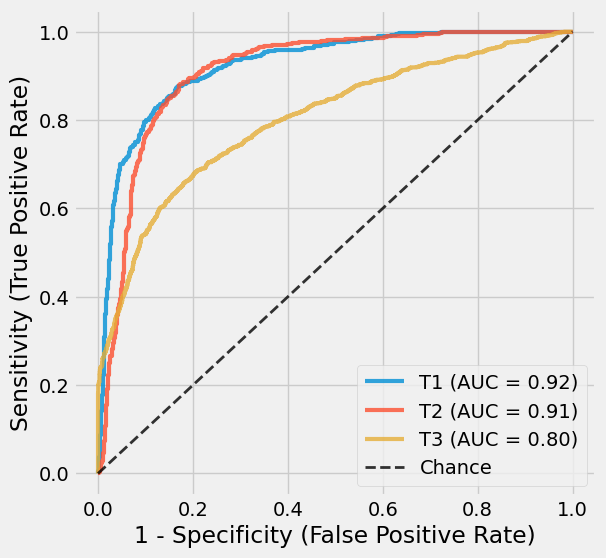

In [108]:
# generate roc curve
plt.close()
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(6,6))
tprs, aucs = [], []
mean_fpr = np.linspace(0,1,100)
for i in range(1, 4):
    predicted_probabilities = q3_teammate_res[:, i]
    fpr, tpr, _ = roc_curve(y_true, predicted_probabilities)
    ns_fpr = np.linspace(0, 1, num=len(y_true))
    ns_tpr = ns_fpr
    # calculate auc 
    lr_auc = roc_auc_score(y_true, predicted_probabilities)
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    interp_tpr[0] = 0.0
    tprs.append(interp_tpr)
    aucs.append(lr_auc)
    # plot roc curve
    ax.plot(fpr, tpr, linestyle="-", lw=3, alpha=0.8, label=f"{columns[i]} (AUC = {lr_auc:.2f})")
ax.plot([0,1],[0,1],linestyle="--", lw=2, color="k", label="Chance", alpha=0.8)

plt.ylabel("Sensitivity (True Positive Rate)")
plt.xlabel("1 - Specificity (False Positive Rate)")
plt.legend(loc="lower right")
plt.show()

## Plot PRC

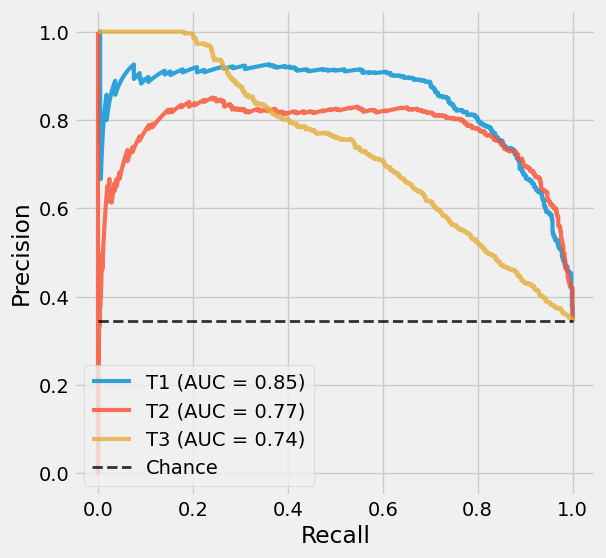

In [109]:
# generate prc curve
plt.close()
plt.rcParams.update(plt.rcParamsDefault)
plt.style.use("fivethirtyeight")
fig, ax = plt.subplots(figsize=(6,6))
tprs, aucs = [], []
chanceAvg = []
mean_fpr = np.linspace(0,1,100)
for i in range(1, 4):
    predicted_probabilities = q3_teammate_res[:, i]
    lr_precision, lr_recall, _ = precision_recall_curve(y_true, predicted_probabilities)
    # calculate auc 
    lr_auc = auc(lr_recall, lr_precision)
    # flip precision and recall
    tpr, fpr = np.fliplr([lr_precision])[0], np.fliplr([lr_recall])[0]
    interp_tpr = np.interp(mean_fpr, fpr, tpr)
    tprs.append(interp_tpr)
    aucs.append(lr_auc)
    # claculate chance
    chance = len(y_true[y_true == 1]) / len(y_true)
    chanceAvg.append(chance)
    # plot roc curve
    ax.plot(lr_recall, lr_precision, linestyle="-", lw=3, alpha=0.8, label=f"{columns[i]} (AUC = {lr_auc:.2f})")
chanceAvg = np.mean(chanceAvg)
ax.plot([0,1],[chanceAvg,chanceAvg],linestyle="--", lw=2, color="k", label="Chance", alpha=0.8)

plt.ylabel("Precision")
plt.xlabel("Recall")
plt.legend(loc="lower left")
plt.show()